# Handwritten Digit Recognition

###  **a)** Download the handwritten digit database from Canvas: usps.mat. Then, load this file into your Python session. This file contains 4 arrays: `train_patterns`, `test_patterns` of size 256 × 4649, and `train_labels`, `test_labels` of size 10 × 4649. The `train_patterns` and `test_patterns` contain a raster scan of the 16 × 16 gray level pixel intensities, which have been normalized to range within [−1, 1]. The train labels and test labels variables contain the ground truth information of the digit images. That is, if the handwritten digit image `train_patterns[:, j]` truly represents digit $i$, then `train_labels[i, j]` is +1, and all the other entries of `train_labels[:, j]` are -1. 

In [5]:
# Autograder Code cell number 0
from scipy import io
import numpy as np

data_dict = io.loadmat('usps.mat')

train_patterns = data_dict['train_patterns']
train_labels = data_dict['train_labels']
test_patterns = data_dict['test_patterns']
test_labels = data_dict['test_labels']

In [7]:
## importing the usps data set and extracting the training and test sets
data_dict = io.loadmat('/Users/karlacornejoargueta/Downloads/usps.mat')

train_patterns = data_dict['train_patterns']
train_labels = data_dict['train_labels']
test_patterns = data_dict['test_patterns']
test_labels = data_dict['test_labels']


### Now, display the first 16 images in train patterns using plt.subplots(4, 4) and `plt.imshow` functions in Python. Note: You need to reshape each column into a matrix of size 16 × 16 in order to display it correctly.

### In your report you should explain what `train_patterns, test_patterns, train_labels,` and `test_labels` represent and state the dimensions. 

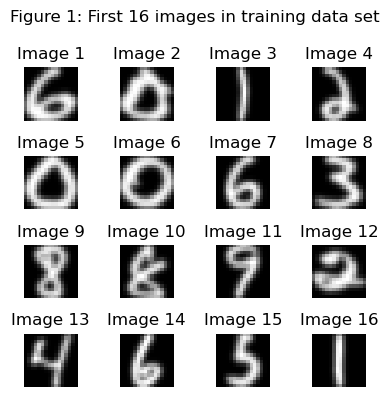

In [13]:
## using matplotlib to plot the images corresponding to the first 16 images
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
fig1, axes = plt.subplots(4, 4, figsize=(4, 4))
for i, ax in enumerate(axes.flat):
    col = train_patterns[:, i]     ## extracting columns 1-16 and reshaping to be 16x16
    col = col.reshape(16,16)
    ax.imshow(col, cmap = 'gray')
    ax.set_title(f'Image {i+1}')
    ax.axis('off') 
fig1.suptitle("Figure 1: First 16 images in training data set")

plt.tight_layout()
plt.show()
fig1.savefig("figure1.jpg")

### (b) Now, compute the mean digits in the train patterns, put them in a matrix called `train_aves` of size 256 × 10, and display these 10 mean digit images using `plt.subplots(2, 5)` and `plt.imshow`. 

### Note: You can gather (or pool) all the images in `train_patterns` corresponding to digit $ j (0 \leq j \leq 9)$ by the following: 
```
train_patterns[:, train_labels[j, :] == 1]
```

In [10]:
# Autograder Code cell number 1
# The autograder won't check the images and intermediate results

## computing train_aves as a matrix that stores the averages for each digit
train_aves = np.zeros((256, 10))
for j in range(10):
    digits = train_patterns[:, train_labels[j, :] == 1]  ## matching digits to the label
    for i, col in enumerate(digits):
        train_aves[i,j]= np.mean(col) ## computing the averages

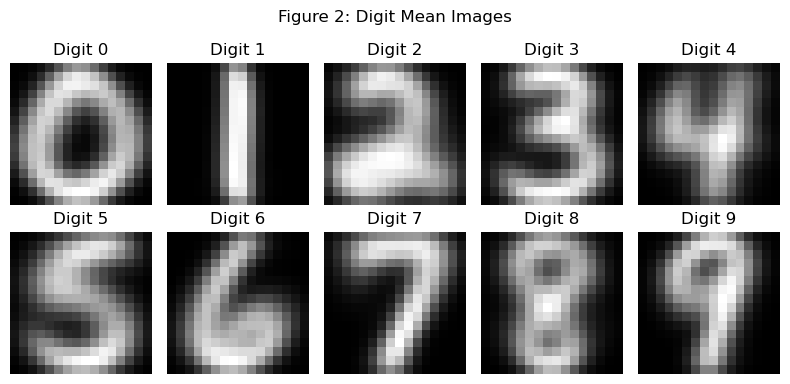

In [11]:
## using matplotlib to show the mean images
fig2, axes = plt.subplots(2, 5, figsize=((8, 4)))
for i, ax in enumerate(axes.flat):
    ave = train_aves[:,i].reshape(16,16) ## reshaping into 16x16 pixels
    ax.imshow(ave, cmap = 'gray')
    ax.set_title(f'Digit {i}')
    ax.axis('off') 
fig2.suptitle("Figure 2: Digit Mean Images")

plt.tight_layout()
plt.show()
fig2.savefig("figure2.jpg")

### (c) Let’s conduct the simplest classification experiments as follows: 

### (c.1) First, prepare a matrix called `test_classif` of size 10 × 4649 and fill this matrix by computing the Euclidean distance (or its square) between each image in the `test_patterns` and each mean digit image in `train_patterns.`

In [13]:
# Autograder Code cell number 2
# The autograder won't check the intermediate results

## initializing a matrix 10x4649 to include all classifiers 
test_classif = np.zeros((10, 4649))

for i in range(10):
    for j in range(test_patterns.shape[1]):     
        differences = test_patterns[:,j] - train_aves[:, i]    ## taking differences from test_patterns and the mean images and then 2-norm
        test_classif[i, j] = np.sum(differences ** 2, axis=0)
    

### (c.2) Then, compute the classification results (the predicted label for `test_patterns`) by finding the position index of the minimum of each column of `test_classif`. Put the results in a vector `test_classif_res` of size 1 × 4649

**Note:** You can find the position index giving the minimum of the j-th column
of `test_classif` by `np.argmin` function.

In [16]:
# Autograder Code cell number 3
# The autograder won't check the intermediate results

## taking the minimum of the classifications for the classification results
test_classif_res = np.zeros((1,4649))
test_classif_res = np.argmin(test_classif, axis=0)

### (c.3) Finally, compute the confusion matrix `test_confusion` of size 10 × 10, and the overall classification rate (i.e., the ratio of the `test_patterns` with the correct predicted label).

**Note:** First gather the classification results corresponding to the ***k***th digit by 

```
tmp = test_classif_ref[np.where(test_labels[k,:] == 1)[0]]
```

This `tmp` array contains the results of your classification of the test digits whose true digit is $k (0 \leq k \leq 9).$ In other words, if your classification results were perfect, all the entries of the `tmp` would be ***k.*** But in reality, this simplest classification algorithm makes mistakes, so `tmp` contains values other than ***k.*** You need to count how many entries have the value ***j*** in `tmp`, $j = 0 : 9.$ That would give you the ***k***th row of the `test_confusion` matrix.

In [20]:
# Autograder Code cell number 4
# The autograder will check the classification rate and test_confusion
# Please name the two variables as ``rate`` and ``test_confusion``

## initializing confusion matrix
test_confusion = np.zeros((10,10))

for k in range(10):
    tmp = test_classif_res[np.where(test_labels[k,:] == 1)[0]] ## checking if the classification label is the same as the test label
    for j in range(10):
        test_confusion[k, j] = np.sum(tmp == j) ## computing classification matrix
correct = np.trace(test_confusion)   ## obtaining classification rate from matrix
total = np.sum(test_confusion)  
rate = correct / total
print(rate)

0.8466336846633684


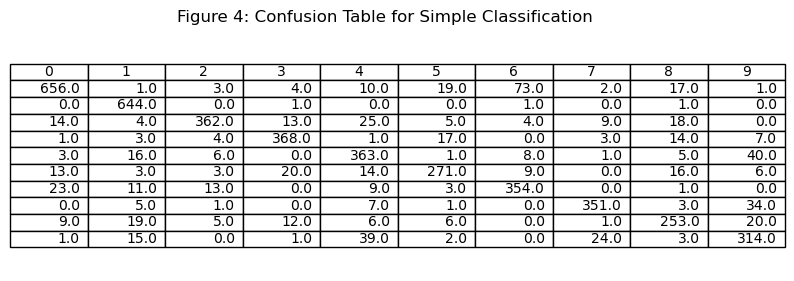

In [21]:
import pandas as pd

## using pandas to display confusion table
df = pd.DataFrame(test_confusion)

fig, ax = plt.subplots(1, 1, figsize=(10, 3))
ax.axis('off')
ax.table(cellText=df.values, colLabels=df.columns, loc='center')
fig.suptitle("Figure 4: Confusion Table for Simple Classification")
plt.savefig('figure4.jpg')

### (d) Finally, let’s conduct the SVD-based classification experiments.
### (d.1) Pool all the images corresponding to the jth digit `train_patterns`, compute the rank k SVD of that set of images (i.e., the first k singular values and vectors), and put the left singular vectors (or the matrix U) of jth digit into the array `train_u` of size 256 × k × 10. For j = 0 : 9, you can do the following:

```
train_u[:,:,j], tmp, tmp2 = svds(train_patterns[:,train_labels[j,:]==1], k)
```

In [23]:
from scipy.sparse.linalg import svds
k = 15
## define a function to get the k-th rank svd of traing matrix 
def compute_train_svd(train_patterns,train_labels, k):
    train_u = np.zeros((256, k, 10))
    for j in range(10):
        train_u[:,:,j], tmp, tmp2 = svds(train_patterns[:,train_labels[j,:]==1], k)  ## using svds function from scipy.sparce.linalg
    return train_u
train_u = compute_train_svd(train_patterns,train_labels, k) ## u matrix for training data with k =15 for example

**Note:** We do not need the singualr values and right singular vectors in this experiment. The `svds` is the same function we used in Homework 7.

### (d.2) Now, compute the expansion coefficients of each test digit image with respect to the k singular vectors of each train digit image set. In other words, you need to compute $k \times 10$ numbers for each test digit image. Put the results in the 3D array `test_svd` of size $k × 4649 × 10$. This can be done by:

```
for j in range(10):
    test_svd[:, :, j] = train_u[:, :, j].T @ test_patterns
```

In [26]:
## computing part of the expansion coefficient
def expansion_coeff(train_u, test_patterns):
    test_svd = np.zeros((k,4649,10))
    for j in range(10):
        test_svd[:, :, j] = train_u[:, :, j].T @ test_patterns
    return test_svd
test_svd = expansion_coeff(train_u, test_patterns) 

### (d.3) Next, compute the error between each original test digit image and its rank $k$ approximation using the $j$th digit images in the training dataset. The idea of this classification is that if a test digit image should belong to class of $j^∗$th digit if the corresponding rank $k$ approximation is the best approximation (i.e., the smallest error) among 10 such approximations. Prepare a matrix `test_svdres` of size 10 × 4649, and put those approximation errors into this matrix.


**Note:** The rank $k$ approximation of test digits using the $k$ left singular vectors of the $j$th digit training images can be computed by 
```
train_u[:,:,j] @ test_svd[:,:,j]
```

In [29]:
## computing the errors between the expansion coefficient and the test patterns
def error(test_patterns, train_u, test_svd):
    test_svdres = np.zeros((10,4649))
    for j in range(10):
        rank_k_approx = train_u[:,:,j] @ test_svd[:,:,j]
        dif = test_patterns - rank_k_approx
        for i in range(test_patterns.shape[1]):
            test_svdres[j, i] = np.linalg.norm(dif[:, i]) ** 2  ## using the norms as classification
    return test_svdres
test_svdres = error(test_patterns, train_u, test_svd) ## computing for the data with k = 15

### (d.4) Create a function `usps_svd_classification`. For $k$ = 1 : 20, run the function and compare the overall classification rate and report your results by plotting a figure of the overall classification rates versus the rank $k$. Which $k$ has the best classification rate?

In [31]:
# Autograder Code cell number 5
# Note that Autograder will only read the code cell number 0 and forget about the results from cell number 1 to 4

from scipy.sparse.linalg import svds

def usps_svd_classification(train_patterns, test_patterns, train_labels, test_labels, k):
    """
    Implemented the rank k SVD-based classification on the usps dataset
    
    INPUT:

    - train_pattern: The training patterns in the data set.
    - test_pattern: The test patterns in the data set.
    - train_label: The training labels in the data set. 
    - test_label: The test label in the data set. 
    - k: the k-th value for optimal classification.

    OUTPUT:
    
    - rate: the overall classification rate of the test_patterns
    - test_predict: the predicted label for the test_patterns
    """
    ## implementing same steps as above
    train_u = np.zeros((256, k, 10))
    test_svdres = np.zeros((10,4649))
    test_svd = np.zeros((k,4649,10))
    correct = 0
    
    for j in range(10):
        train_u[:,:,j], tmp, tmp2 = svds(train_patterns[:,train_labels[j,:]==1], k) ## k rank svd
        test_svd[:, :, j] = train_u[:, :, j].T @ test_patterns   
        rank_k_approx = train_u[:,:,j] @ test_svd[:,:,j]   ## expansion coefficient
        dif = test_patterns - rank_k_approx                ## difference from expansion coefficient
        for i in range(test_patterns.shape[1]):
            test_svdres[j, i] = np.linalg.norm(dif[:, i]) ** 2  ## 2-norm of the difference

    test_predict = np.argmin(test_svdres, axis=0)         ## prediction label using the minimum error
        
    for i in range(test_patterns.shape[1]):
        true_label = np.where(test_labels[:, i] == 1)[0][0]   ## computing the count of correct labels
        if test_predict[i] == true_label:
            correct += 1
    rate = correct / test_patterns.shape[1]            ## computing accuracy rate

    return rate, test_predict

    

In [32]:
# Autograder Code cell number 6
# The autograder won't check the images
# The autograder will check the classification rates for k from 1 to 20
# Please name the variable as ``rate_list``, which is a numpy.array of size 20.

## initializes matrix of 1x20
rate_list = np.zeros(20)
## computes accuracy rates for k from 1 to 20 using the function above
for k in range(1,21):
    rate, test_predict = usps_svd_classification(train_patterns, test_patterns, train_labels, test_labels, k)
    rate_list[k-1] = rate

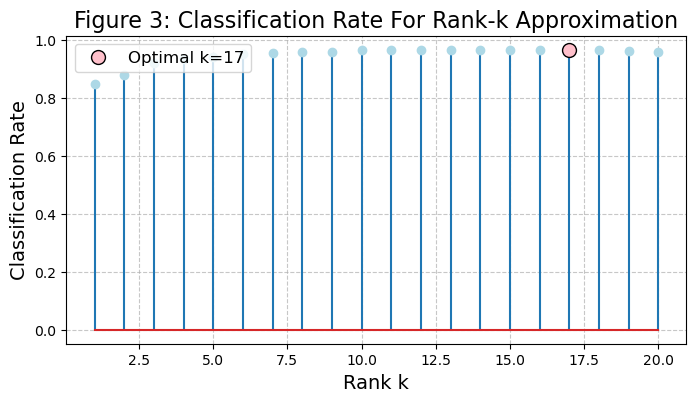

In [33]:
## using matplot to plot optimal value
optimal_k_index = np.argmax(rate_list)  ## optimal value is the maximum accuracy rate in the list above
 
fig3 = plt.figure(figsize=(8, 4))
markerline, stemlines, baseline = plt.stem(range(1, len(rate_list) + 1), rate_list)  ## creates a stem plot
markerline.set_color('lightblue')  

## highlights the optimal value 
plt.plot(
    range(1, len(rate_list) + 1)[optimal_k_index],  
    rate_list[optimal_k_index],                   
    'o',                                          
    color='pink',                                 
    markeredgecolor='black',                      
    markersize=10,                                
    label=f'Optimal k={optimal_k_index + 1 }'     ## adding label for optimal value
)

plt.title("Figure 3: Classification Rate For Rank-k Approximation", fontsize=16)
plt.xlabel("Rank k", fontsize=14)
plt.ylabel("Classification Rate", fontsize=14)

plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12, loc=2)

plt.show()
fig3.savefig("figure3.jpg")

### (d.5) Finally, compute the confusion matrix and the overall classification rate using this best SVD-based classification method by following the same strategy as Parts (c.2) and (c.3) above. Let’s name this confusion matrix `test_svd_confusion`.

In the results section of your report, you should at least have the plot from part (d.4) and report the confusion matrix and the overall classification rate for this dataset by the different methods (the simplest classification and only pick the best ***k*** SVD).

In [36]:
# Autograder Code cell number 7
# The autograder will check the classification rate and test_confusion for best k
# Please name the two variables as ``rate`` and ``test_confusion``

## running the svd classification function for optimal value
true_labels = np.argmax(test_labels, axis=0)
rate, test_predict = usps_svd_classification(train_patterns, test_patterns, train_labels, test_labels, 17)

## initializing confusion matrix
test_confusion = np.zeros((10,10))

for i in range(len(test_predict)):          ## creates confusion table in which the predicted labels are the same as the true labels
    true_class = true_labels[i]  
    predicted_class = test_predict[i]  
    
    test_confusion[true_class, predicted_class] += 1 

0.9662292966229297


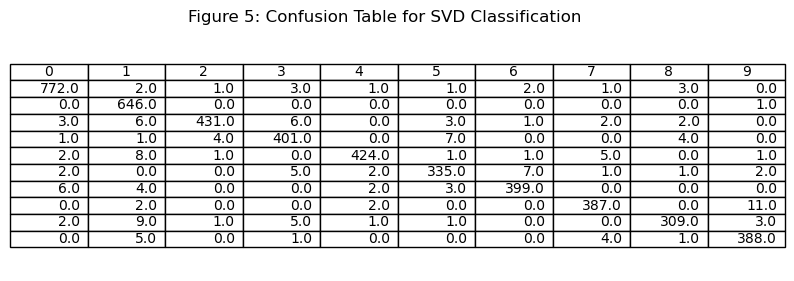

In [37]:
df = pd.DataFrame(test_confusion)

## using panda to visualize the table
fig5, ax = plt.subplots(1, 1, figsize=(10, 3))
ax.axis('off')
ax.table(cellText=df.values, colLabels=df.columns, loc='center')
fig5.suptitle("Figure 5: Confusion Table for SVD Classification")
plt.savefig('figure5.jpg')
print(rate_list[16])

### (e) Try the method on another larger handwritten-digit dataset (for example, MNIST dataset) and test other machine learning algorithm on the dataset.

In [39]:
## using sklearn to import MNIST data set and K-NN Classifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [40]:
## loading the MNIST dataset
mnist = datasets.fetch_openml("mnist_784")
x = mnist.data.to_numpy()  
y = mnist.target.astype(int)  

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)

## scaling and transposing data to make computations easier and more accurate
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train).transpose()
x_test = scaler.transform(x_test).transpose()

y_test = y_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)


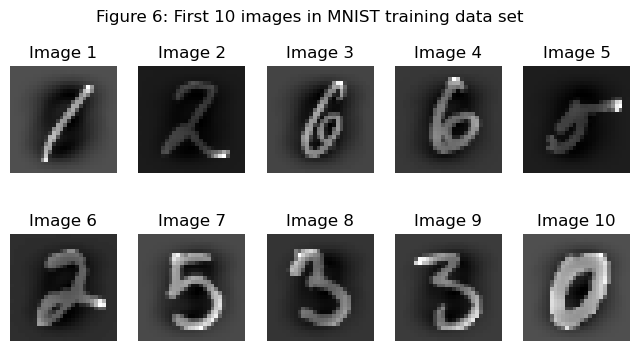

In [41]:
## plotting the first 10 images using matplotlib
y_train_np = y_train.to_numpy() if isinstance(y_train, pd.Series) else y_train ## changing to numpy array so it can be visualized 
fig5, axes = plt.subplots(2, 5, figsize=(8, 4))
for i, ax in enumerate(axes.flat):
    col = x_train[:, i]
    col = col.reshape(28,28)        ## reshaping into 28x28 images
    ax.imshow(col, cmap = 'gray')
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

fig5.suptitle("Figure 6: First 10 images in MNIST training data set")
plt.show()
fig5.savefig("figure6.jpg")

In [42]:
def mnist_svd_classification(train_set, test_set, train_labels, test_labels, k):
    """
    Implement rank-k SVD-based classification on the MNIST dataset
    
    INPUT:
    - train_set: The training patterns in the data set.
    - test_set: The test patterns in the data set.
    - train_label: The training labels in the data set. 
    - test_label: The test label in the data set.
    - k: rank for the SVD approximation.
    
    OUTPUT:
    - rate: classification rate (accuracy) on the test set.
    - test_predict: predicted labels for the test patterns.
    """ 
    ## adapting the svd classification to fit the MNIST data set
    test_svdres = np.zeros((10, test_set.shape[1]))  
    correct = 0  
    
    U_all = np.zeros((train_set.shape[0], k, 10))  

    for j in range(10):
        X_j = train_set[:, train_labels == j] ## using the training data
        
        U_all[:, :, j], _, _ = svds(X_j, k=k)  ## computing SVD and saving U

        test_svd = U_all[:, :, j].T @ test_set  

        rank_k_approx = U_all[:, :, j] @ test_svd  ## expansion coefficient 
        dif = test_set - rank_k_approx  
        
        test_svdres[j, :] = np.linalg.norm(dif, axis=0) ** 2 ## residual error
    
    
    test_predict = np.argmin(test_svdres, axis=0)  ## classifying on the minimum error
    
    correct = np.sum(test_predict == test_labels)
    rate = correct / test_set.shape[1]        ## obtaining accuracy rate
    
    return rate, test_predict


In [43]:
## obtaining accuracy rate for k from 1 to 20 to find optimal value
rate_list_svd = np.zeros(20)
for k in range(1,21):
    rate, test_predict = mnist_svd_classification(x_train, x_test, y_train, y_test, k)
    rate_list_svd[k-1] = rate

In [44]:
def knn_mnist_classification(x_train, x_test, y_train, y_test, n=3):
    """
    Implement KNN-based classification on the MNIST dataset
    
    INPUT:
    - x_train: The training patterns in the data set.
    - x_test: The test patterns in the data set.
    - y_train: The training labels in the data set. 
    - y_test: The test label in the data set.
    - n: number of neighbors for the KNN classifier (default is 3).
    
    OUTPUT:
    - rate: classification rate (accuracy) on the test set.
    - test_predict: predicted labels for the test patterns.
    """

    ## computing knn classification to the MNIST data set 
    
    x_train = x_train.transpose()  ## transposing the data for the dimensions to match with the sklearn knn function
    x_test = x_test.transpose()
    
    knn = KNeighborsClassifier(n_neighbors=n) ## using sklearn to obtain classifier with n neighbors
    
    knn.fit(x_train, y_train)  ## fitting the classifier onto the training data
    
    test_predict = knn.predict(x_test)  ## predicting based on the test data
    
    rate = accuracy_score(y_test, test_predict)  ## obtaining the rate of accuracy
    
    return rate, test_predict


In [45]:
## computing the knn classification for n = 1 to 10 to find optimal value
rate_list_knn = np.zeros(10)
for k in range(1,11):
    rate, test_predict = knn_mnist_classification(x_train, x_test, y_train, y_test, k)
    rate_list_knn[k-1] = rate

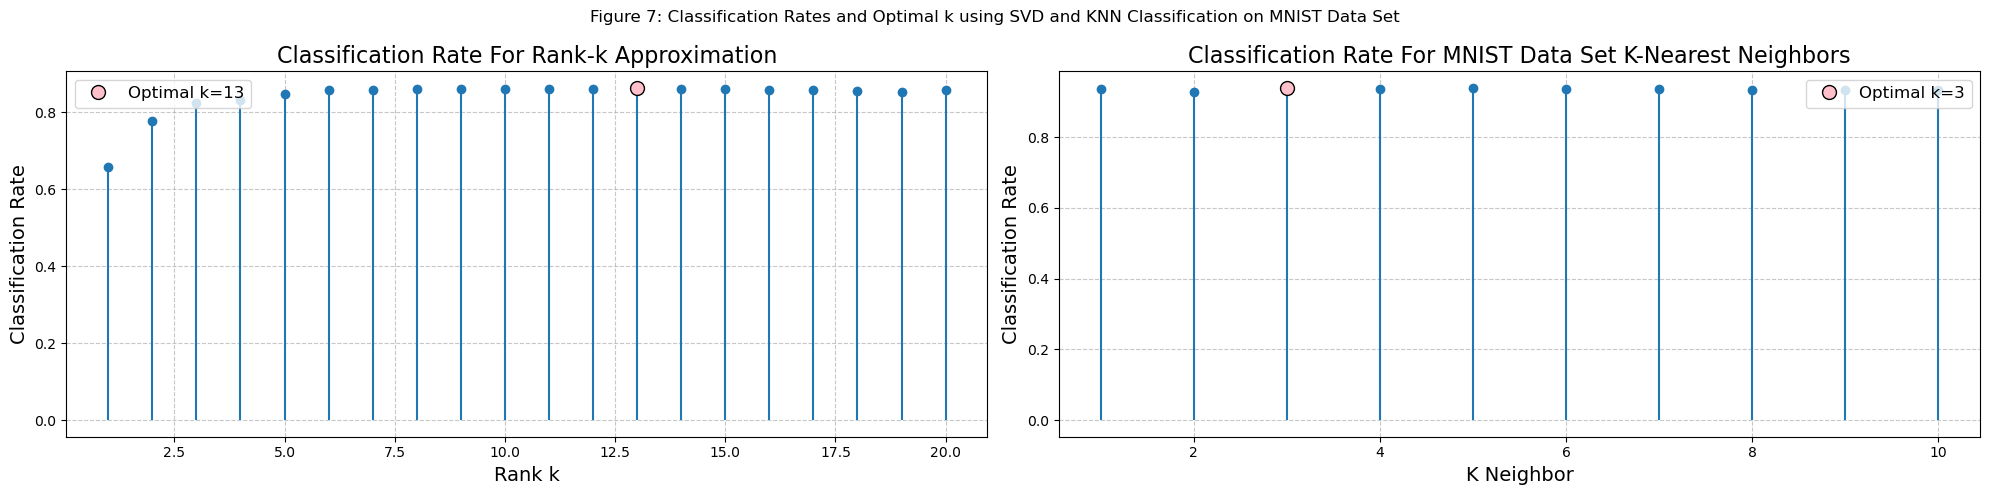

In [46]:
## visualizing optimal values for both knn and svd classification
optimal_k_index_svd = np.argmax(rate_list_svd)  ## taking the maximum accuracy rate in each list 
optimal_k_index_knn = np.argmax(rate_list_knn)

fig7, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

ax1.stem(range(1, len(rate_list_svd) + 1), rate_list_svd, markerfmt='o', basefmt=" ") ## plotting a stem plot for svd on MNIST
ax1.plot(
    range(1, len(rate_list_svd) + 1)[optimal_k_index_svd],  
    rate_list_svd[optimal_k_index_svd],                    
    'o',                                                   
    color='pink',                                          
    markeredgecolor='black',                               
    markersize=10,                                         
    label=f'Optimal k={optimal_k_index_svd + 1}'            
)

ax1.set_title("Classification Rate For Rank-k Approximation", fontsize=16)
ax1.set_xlabel("Rank k", fontsize=14)
ax1.set_ylabel("Classification Rate", fontsize=14)
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.legend(fontsize=12, loc=2)

ax2.stem(range(1, len(rate_list_knn) + 1), rate_list_knn, markerfmt='o', basefmt=" ") ## plotting a stem plot for knn on MNIST
ax2.plot(
    range(1, len(rate_list_knn) + 1)[optimal_k_index_knn], 
    rate_list_knn[optimal_k_index_knn],                    
    'o',                                                   
    color='pink',                                         
    markeredgecolor='black',                               
    markersize=10,                                         
    label=f'Optimal k={optimal_k_index_knn + 1}'            
)

ax2.set_title("Classification Rate For MNIST Data Set K-Nearest Neighbors", fontsize=16)
ax2.set_xlabel("K Neighbor", fontsize=14)
ax2.set_ylabel("Classification Rate", fontsize=14)
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.legend(fontsize=12, loc=1)

fig7.suptitle("Figure 7: Classification Rates and Optimal k using SVD and KNN Classification on MNIST Data Set")
plt.tight_layout()
plt.show()
fig7.savefig("figure7.jpg")

In [47]:
## initializing the confusioon tables for both svd and knn and their optimal values
rate_svd, test_predict_svd = mnist_svd_classification(x_train, x_test, y_train, y_test, np.argmax(rate_list_svd)+1)
rate_knn, test_predict_knn = knn_mnist_classification(x_train, x_test, y_train, y_test, np.argmax(rate_list_knn)+1)
test_confusion_svd = np.zeros((10,10))
test_confusion_knn = np.zeros((10,10))

In [48]:
## computing both tables
for i in range(len(test_predict_svd)):
    true_class = y_test[i]  
    predicted_class = test_predict_svd[i]  
    
    test_confusion_svd[true_class, predicted_class] += 1 ## for svd
    
for i in range(len(test_predict_knn)):
    true_class = y_test[i]  
    predicted_class = test_predict_knn[i]  
    
    test_confusion_knn[true_class, predicted_class] += 1 ## for knn

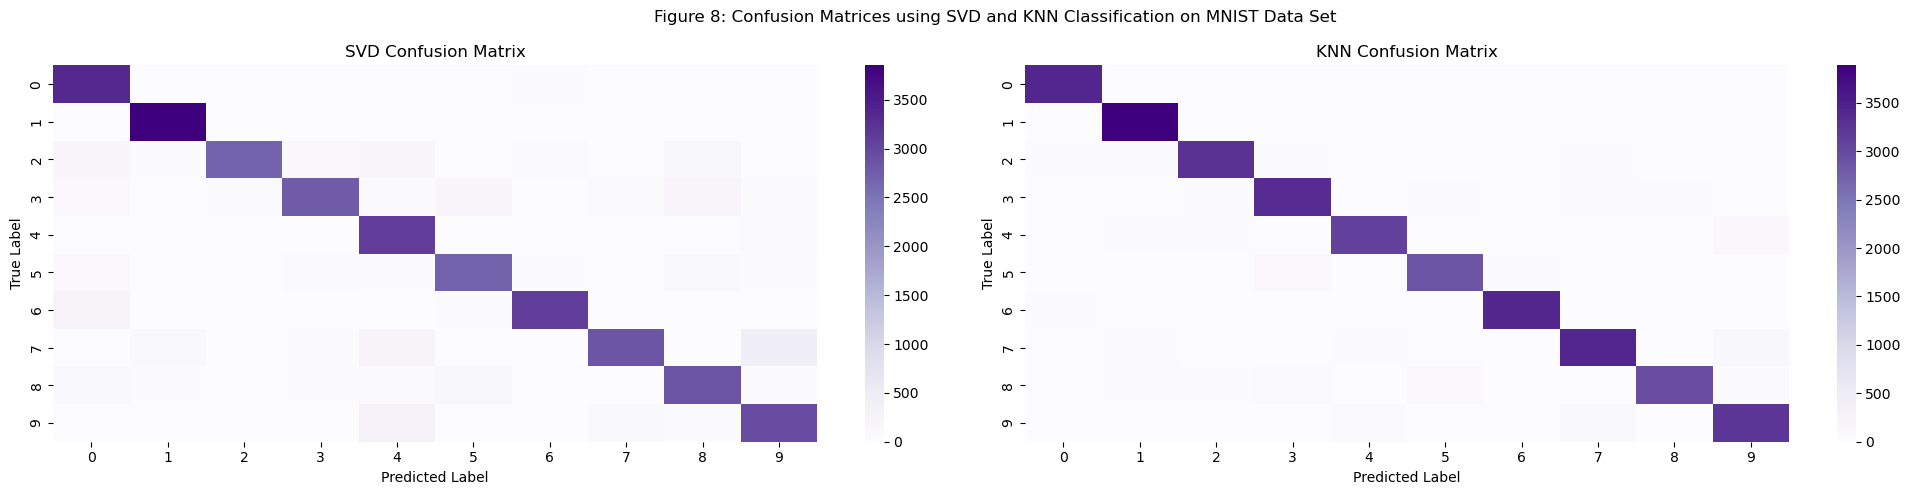

In [49]:
import seaborn as sns
fig8, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

## using seaborn to visualize tables as heatmaps
## data set is too large to represent in a regular table
sns.heatmap(test_confusion_svd, annot=False, cmap='Purples', xticklabels=np.arange(10), yticklabels=np.arange(10),ax = ax1)

ax1.set_title('SVD Confusion Matrix')
ax1.set_xlabel('Predicted Label')
ax1.set_ylabel('True Label')  ## SVD


## visualizing knn
sns.heatmap(test_confusion_knn, annot=False, cmap='Purples', xticklabels=np.arange(10), yticklabels=np.arange(10),ax = ax2)

ax2.set_title('KNN Confusion Matrix')
ax2.set_xlabel('Predicted Label')
ax2.set_ylabel('True Label')

fig8.suptitle("Figure 8: Confusion Matrices using SVD and KNN Classification on MNIST Data Set")
plt.tight_layout()
plt.show()
fig8.savefig("figure8.jpg")
